In [1]:
#pip install shap

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import shap 

# df = pd.read_csv('genderIndicators_worldBank_highinc.csv')
df = pd.read_csv('WorldBankDatasets/Gender_WorldBankData.csv')

/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

In [3]:
df = df.dropna(subset=['SH.STA.MMRT'])
df

,Country,Year,IC.FRM.FEMM.ZS,IC.FRM.FEMO.ZS,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ENR.PRIM.FM.ZS,...,SP.POP.AG03.FE.IN,SP.POP.AG03.MA.IN,SP.POP.AG04.FE.IN,SP.POP.AG04.MA.IN,SP.POP.AG05.FE.IN,SP.POP.AG05.MA.IN,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,SP.URB.TOTL.FE.ZS,SP.URB.TOTL.MA.ZS
40,AUS,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02230,...,125071.0,131858.5,127085.0,134011.5,128897.5,136049.5,6.147456,6.687435,44.231568,42.933541
41,AUS,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02444,...,124468.5,131071.0,126049.5,132827.5,128017.5,135058.5,NaN,NaN,NaN,NaN
42,AUS,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02336,...,124767.0,131105.0,125404.5,132012.5,126885.5,133750.5,NaN,NaN,NaN,NaN
43,AUS,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02265,...,125200.0,131440.0,125687.5,132098.5,126297.5,132989.0,NaN,NaN,NaN,NaN
44,AUS,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02003,...,124810.0,131259.0,126234.0,132529.5,126683.5,133201.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,USA,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99833,...,1969807.0,2062236.5,1980703.5,2075242.0,1994372.0,2093948.5,NaN,NaN,NaN,NaN
3296,USA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99234,...,1978766.0,2071786.0,1981373.5,2074372.5,1991103.5,2086558.0,NaN,NaN,NaN,NaN
3297,USA,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99884,...,1990342.5,2080863.0,1991357.0,2084866.5,1991857.0,2085390.0,NaN,NaN,NaN,NaN
3298,USA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00705,...,1982090.0,2074245.0,2004235.0,2094980.0,2003251.5,2097239.5,NaN,NaN,NaN,NaN


## Simple Linear Regression

In [4]:
# First need to encode the country 

# Create a LabelEncoder instance for each categorical column
country_encoder = LabelEncoder()

# Encode the categorical columns
data_encoded = df.copy(deep = True)
data_encoded['Country'] = country_encoder.fit_transform(data_encoded['Country'])

In [5]:
# Replace nans with 0
data_encoded.fillna(0, inplace=True)
data_encoded

,Country,Year,IC.FRM.FEMM.ZS,IC.FRM.FEMO.ZS,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ENR.PRIM.FM.ZS,...,SP.POP.AG03.FE.IN,SP.POP.AG03.MA.IN,SP.POP.AG04.FE.IN,SP.POP.AG04.MA.IN,SP.POP.AG05.FE.IN,SP.POP.AG05.MA.IN,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,SP.URB.TOTL.FE.ZS,SP.URB.TOTL.MA.ZS
40,0,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.02230,...,125071.0,131858.5,127085.0,134011.5,128897.5,136049.5,6.147456,6.687435,44.231568,42.933541
41,0,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.02444,...,124468.5,131071.0,126049.5,132827.5,128017.5,135058.5,0.000000,0.000000,0.000000,0.000000
42,0,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.02336,...,124767.0,131105.0,125404.5,132012.5,126885.5,133750.5,0.000000,0.000000,0.000000,0.000000
43,0,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.02265,...,125200.0,131440.0,125687.5,132098.5,126297.5,132989.0,0.000000,0.000000,0.000000,0.000000
44,0,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.02003,...,124810.0,131259.0,126234.0,132529.5,126683.5,133201.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,41,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99833,...,1969807.0,2062236.5,1980703.5,2075242.0,1994372.0,2093948.5,0.000000,0.000000,0.000000,0.000000
3296,41,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99234,...,1978766.0,2071786.0,1981373.5,2074372.5,1991103.5,2086558.0,0.000000,0.000000,0.000000,0.000000
3297,41,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99884,...,1990342.5,2080863.0,1991357.0,2084866.5,1991857.0,2085390.0,0.000000,0.000000,0.000000,0.000000
3298,41,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00705,...,1982090.0,2074245.0,2004235.0,2094980.0,2003251.5,2097239.5,0.000000,0.000000,0.000000,0.000000


In [6]:
# pull out Maternal Mortality as the predictor variable 
X = data_encoded.drop(columns='SH.STA.MMRT')
y = data_encoded['SH.STA.MMRT']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 55.19283754509466
R-squared: 0.5563231643516541


In [9]:
def plot_linear_reg(X, y, yp, country, title):

 # X - X_test
 # y - y_test
 # yp - y_pred
 # country - list of country abbreviations ie. ['USA']

    if country == None: 

        # Plot the data points and the regression line
        plt.figure(figsize=(30, 20))
        plt.scatter(X['Year'], y, color='blue', label='Data')
        plt.scatter(X['Year'], yp, color='red',  label='Linear Regression')
        plt.xlabel('Year')
        plt.ylabel('Maternal Mortality Ratio')
        plt.title(title)
        plt.legend()
        plt.figure(figsize=(30, 20))
        plt.show()
        
    else: 
        # Country encoding 
        encoded_values = country_encoder.transform(country)
        # looking at just the secific country predictions in test partition

        # Use boolean indexing to select the subset of the DataFrame
        condition = X['Country'].isin(encoded_values)
        X_test = X[condition]['Year']
        y_test = y.loc[X_test.index]

        # take the array index in order to pull the relevant y_pred  
        index_positions = [y.index.get_loc(index) for index in X_test.index]
        
        y_pred = [yp[i] for i in index_positions]
        
        # Plot the data points and the regression line
        plt.figure(figsize=(15, 10))
        plt.scatter(X_test, y_test, color='blue', label='Data')
        plt.scatter(X_test, y_pred, color='red',  label='Linear Regression')
        plt.xlabel('Year')
        plt.ylabel('Maternal Mortality Ratio')
        plt.title(title)
        plt.legend()
        plt.show()

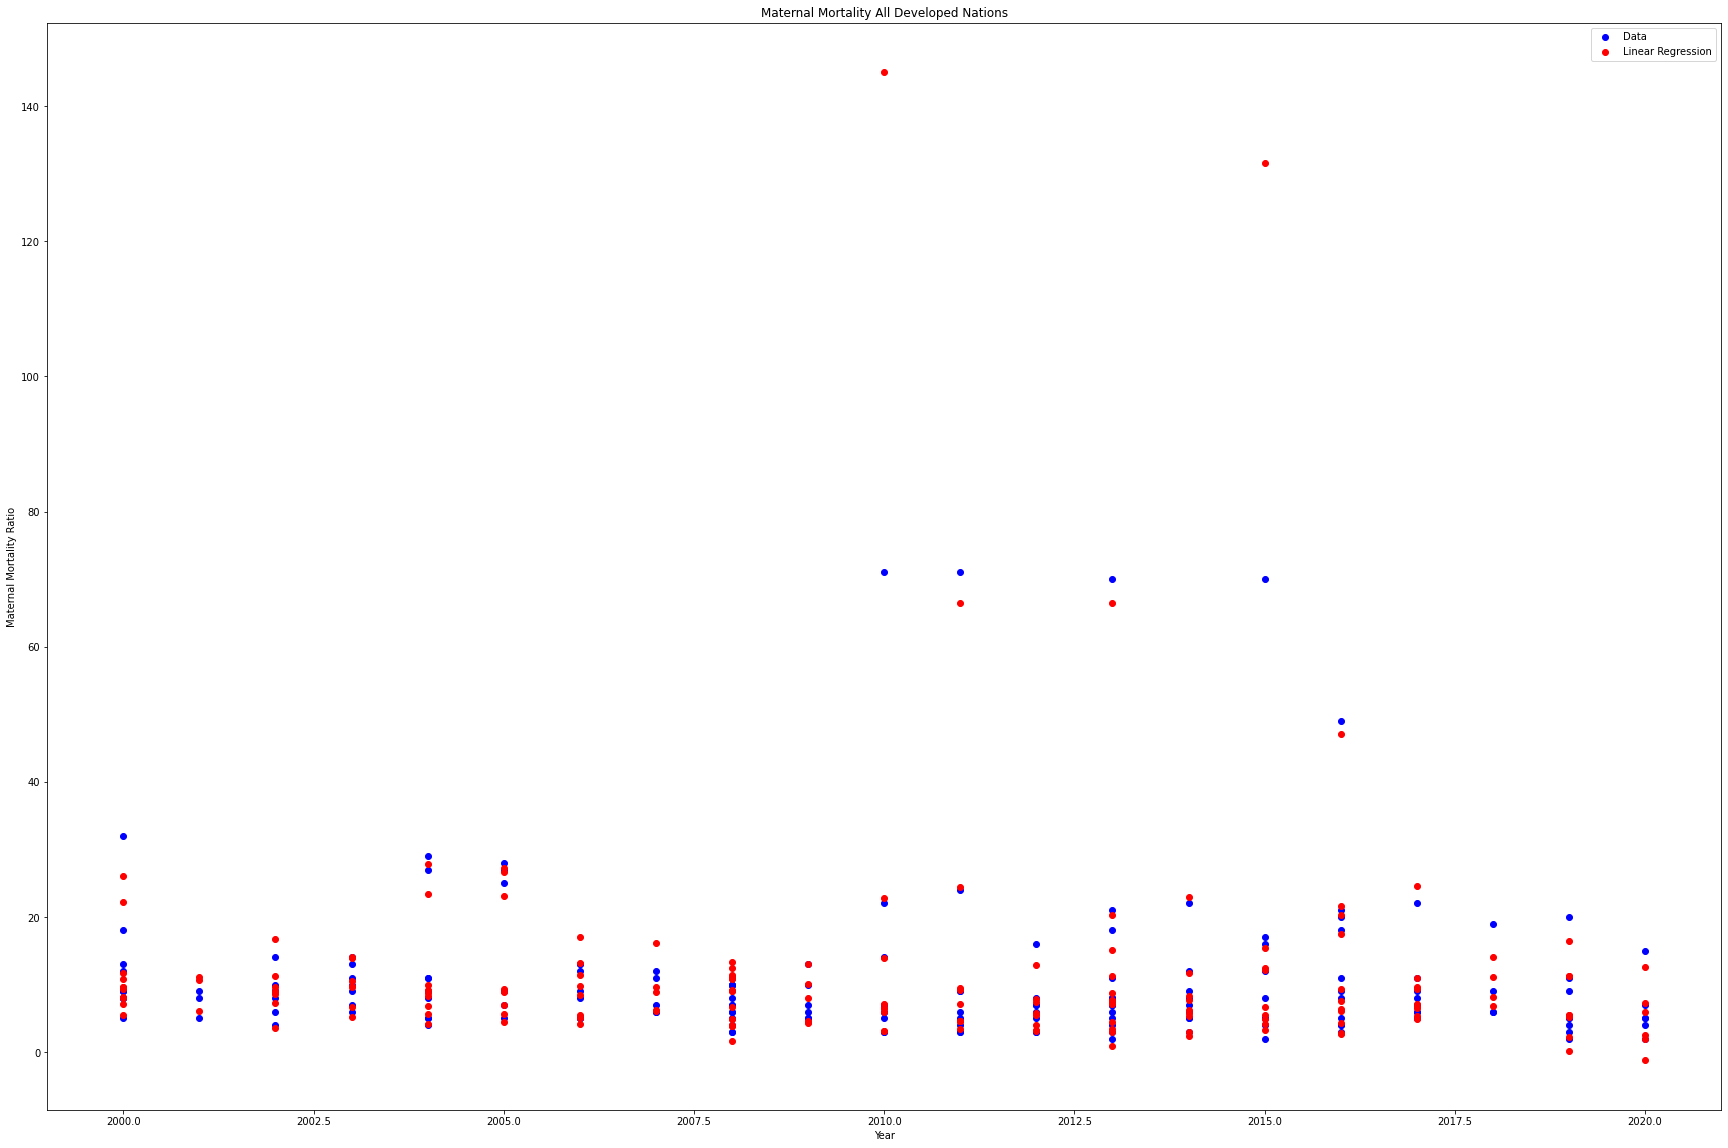

<Figure size 2160x1440 with 0 Axes>

In [10]:
plot_linear_reg(X_test, y_test, y_pred, country = None, title = 'Maternal Mortality All Developed Nations')

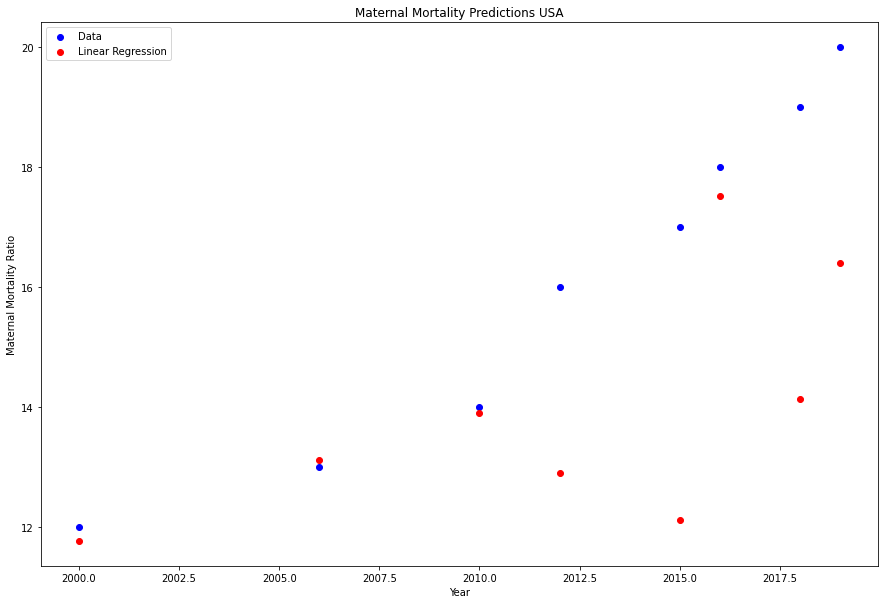

In [11]:
plot_linear_reg(X_test, y_test, y_pred, country = ['USA'], title = 'Maternal Mortality Predictions USA')

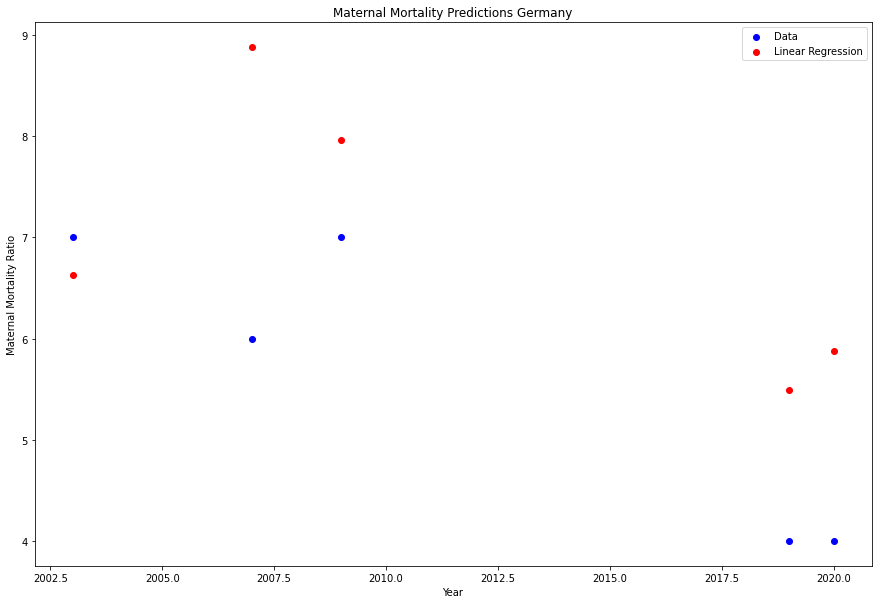

In [12]:
plot_linear_reg(X_test, y_test, y_pred, country = ['DEU'], title = 'Maternal Mortality Predictions Germany')

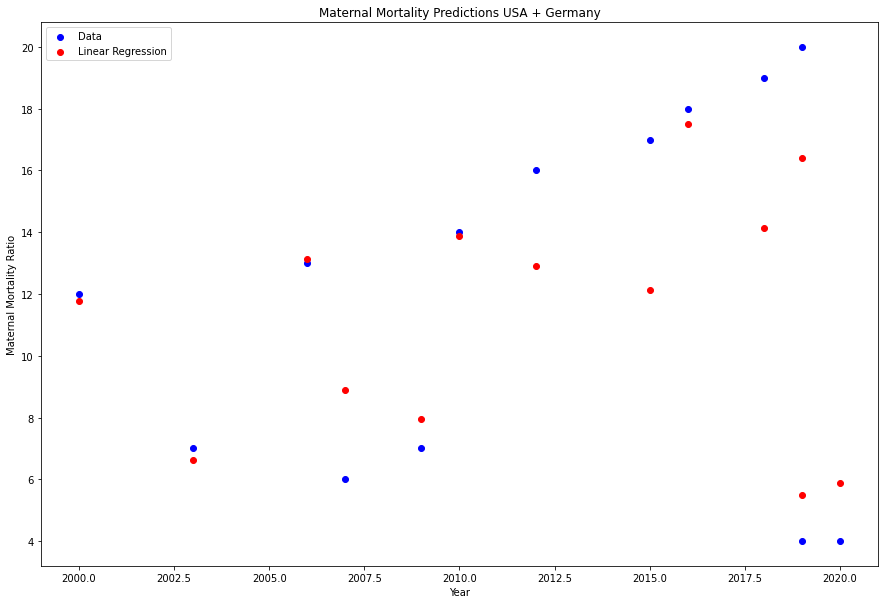

In [13]:
plot_linear_reg(X_test, y_test, y_pred, country = ['DEU', 'USA'], title = 'Maternal Mortality Predictions USA + Germany')

## Shapley Values

In [14]:
explainer = shap.LinearExplainer(model, X_train)

# look at the features for all instances
shap_values = explainer.shap_values(X_test) 

shap.summary_plot(shap_values)

#shap_values.shape

In the future `np.bool` will be defined as the corresponding NumPy scalar.


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
print(f'These are the top features: {X_train.columns[223]}, {X_train.columns[217]}, {X_train.columns[213]}, {X_train.columns[235]}')
      

SL.EMP.VULN.MA.ZS: Vulnerable employment, male (% of male employment) (modeled ILO estimate)   
SL.EMP.SELF.MA.ZS: 	Self-employed, male (% of male employment) (modeled ILO estimate)   
SL.EMP.MPYR.MA.ZS:	Employers, male (% of male employment) (modeled ILO estimate)   
SL.SRV.EMPL.MA.ZS: 	Employment in services, male (% of male employment) (modeled ILO estimate)   

In [ ]:
# look at the features for the USA predictions 
encoded_values = country_encoder.transform(['USA'])

condition = X_test['Country'].isin(encoded_values)
X_country_lens = X_test[condition]['Year']

shap_values = explainer.shap_values(X_test.loc[X_country_lens.index]) 
shap.summary_plot(shap_values)